# Mini-Project: SVM & LR Classification - MSDS 7331
## Southern Methodist University 
# Glenn, Tweardy, Severance

## Business Understanding

The dataset for analysis originates from the UCI Machine Learning Repository. It contains data from the 1994 Census database and was originally extracted by Barry Becker. These data contain 48,842 observations and 14 attributes seperated in two distinct datsets, training and testing. Becker extracted the census data based on meeting all of the following four conditions:
        
        1. AAGE > 16
        2. AGI > 100
        3. AFNLWGT > 1
        4. HRSWK > 0

As noted, these data are split by Becker into train-test datasets using MLC++ GenCVFiles (2/3, 1/3 random).

48,842 instances, mix of continuous and discrete    (train=32,561, test=16,281)

45,222 of instances with unknown values are removed (train=30,162, test=15,060)

train = adult.data AND test = adult.test

Ref: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

The original task for gathering this dataset and what will be analyzed throughout this semester's project is to predict whether an individual earns more than $50,000 per year in annual salary.  The attribte salary_range designates the annual salary via a binary classification of: >50K or <=50K.

We aim to use the classification prediction method of taking the collection of records (adult.data) as the training set, whereas salary_range is the class.  We will develop a model which aims to predict the class, salary_range, as a function of the other attributes.  Ultimately, our goal is take the test data, adult.test, and predict the class, salary_range, as accurately as possible.  Therefore, below we are preprocessing the training dataset, adult.data, containing the 32,561 instances.

In conducting an analysis on this data, there are many reasons why an organization would benefit from it. One in particular could be from a marketing standpoint. Businesses invest a large portion of there expenditures toward their marketing department to make sure that they market their products toward the correct demographics. For example, marketing the latest and greatest BMW to a demographic of individuals that make less than $50k annually is probably not a smart business decision and would undoubtedly fail. The financial cost of this mistake could potentially cost a company millions of dollars. The benefit a company has to understanding their customer base can truly be a profitable advantage. The factors in this model could be used by an organization to manage their marketing activity by developing and advertising products to meet the needs of their specific customer base.

## Project Data Import

We first load our Project 1 dataset and prepare it for analysis. 

<b>The below describes the meaning and type of data for each attribute in the data file per UCI Machine Learning Repository:</b><br>
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names<br>

<b>age:</b> <u>Ordinal.</u><br>
<b>workclass:</b> <u>Categorical.</u> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
<b>fnlwgt:</b> <u>Continuous.</u><br>
<b>education:</b> <u>Categorical.</u> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
<b>education-num:</b> <u>Ordinal.</u><br>
<b>marital-status:</b> <u>Categorical.</u> Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
<b>occupation:</b> <u>Categorical.</u> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
<b>relationship:</b> <u>Categorical.</u> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
<b>race:</b> <u>Categorical.</u> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
<b>sex:</b> <u>Categorical.</u> Female, Male.<br>
<b>capital-gain:</b> <u>Continuous.</u><br>
<b>capital-loss:</b> <u>Continuous.</u><br>
<b>hours-per-week:</b> <u>Ordinal.</u><br>
<b>native-country:</b> <u>Categorical.</u> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>
<b>salary_category:</b> <u>Categorical.</u> >50K, <=50K.<br>


In [1]:
import pandas as pd
import numpy as np

# reference: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# load data and assign attribute field names
df = pd.read_csv('data/adult.data', 
names = ["age", "workclass", "fnlwgt", "education", "education_num","marital_status","occupation",
         "relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country",
         "salary_category"])

<b>The below block code is our transformation and removal of missing data.</b>

In [2]:
# reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb

# Changing the numeric values to be floats
continuous_features = ['fnlwgt', 'capital_gain', 'capital_loss']

# Changing oridnal values to be integers
ordinal_features = ['age','education_num','hours_per_week']

# we won't touch these variables, keep them as categorical
categ_features = ['workclass','education','marital_status','occupation',
                  'relationship','race','sex','native_country','salary_category'];

# Using the "astype" function to change the variable type
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)

# Replacing missing values which are represented as question marks in data with NaN 
df = df.replace(to_replace=' ?', value=np.nan)

# http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-of-certain-column-is-nan
# Drop all records with any values of NaN (missing values)
df.dropna(inplace=True)

In [3]:
# View the summary of the variables to ensure salary_cat_binary type is Int64 and view objects for subsequent block of code.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age                30162 non-null int64
workclass          30162 non-null object
fnlwgt             30162 non-null float64
education          30162 non-null object
education_num      30162 non-null int64
marital_status     30162 non-null object
occupation         30162 non-null object
relationship       30162 non-null object
race               30162 non-null object
sex                30162 non-null object
capital_gain       30162 non-null float64
capital_loss       30162 non-null float64
hours_per_week     30162 non-null int64
native_country     30162 non-null object
salary_category    30162 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


## Begin SVM and Logistic Regression Modeling

Below we look further at each of the categorical objects.

In [4]:
# reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits and SVM.ipynb
# View categorical variables which need to onehotencoding.

df[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary_category']].describe().transpose()

,count,unique,top,freq
workclass,30162,7,Private,22286
education,30162,16,HS-grad,9840
marital_status,30162,7,Married-civ-spouse,14065
occupation,30162,14,Prof-specialty,4038
relationship,30162,6,Husband,12463
race,30162,5,White,25933
sex,30162,2,Male,20380
native_country,30162,41,United-States,27504
salary_category,30162,2,<=50K,22654


A look at our 9 categorical variables reveals:
* Workclass has 7 unique values, the most frequently occurring value is 'Private' - 74% of all occurances (22,286/30,162)
* Education has 16 unique values, the most frequently occurring value is 'HS-Grad' - 33% of all occurances (9,840/30,162)
* Marrital Status has 7 unique values, the most frequently occurring value is 'Married-Civ-Spouse' - 47% of all occurances (14,065/30,162) 
* Occupation has 14 unique values, the most frequently occurring value is 'Prof-speciality' - 13% of all occurances (4,038/30,162)
* Relationship has 6 unique values, the most frequently occurring value is 'Husband' - 41% of all occurances (12,463/30,162)
* Race has 5 unique values, the most frequently occurring value is 'White' - 86% of all occurances (25,933/30,162)
* Sex has 2 unique values, the most frequently occurring value is 'Male' - 68% of all occurances (20,380/30,162)
* Native Country has 41 unique values, the most frequently occurring value is 'United States' - 91% of all occurances (27,504/30,162)
* Salary Category has 2 unique values, the most frequently occurring value is '<=50K' - 75% of all occurances (22,654/30,162)

<b>Begin one-hot encoding of the categorical variables</b>

In [5]:
# perform one-hot encoding of the categorical data 
tmp_df = pd.get_dummies(df.workclass,prefix='workclass')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['workclass']

tmp_df = pd.get_dummies(df.education,prefix='education')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['education']

tmp_df = pd.get_dummies(df.marital_status,prefix='marital_status')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['marital_status']

tmp_df = pd.get_dummies(df.occupation,prefix='occupation')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['occupation']

tmp_df = pd.get_dummies(df.relationship,prefix='relationship')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['relationship']

tmp_df = pd.get_dummies(df.race,prefix='race')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['race']

tmp_df = pd.get_dummies(df.native_country,prefix='native_country')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
del df['native_country']

# replace the current Sex atribute with something slightly more intuitive and readable
df['IsMale'] = df.sex=='Male' 
df.IsMale = df.IsMale.astype(np.int)
del df['sex']

# replace the current Salary_Category atribute with something slightly more intuitive and readable
df['salary_cat_binary'] = df.salary_category==' >50K' 
df.salary_cat_binary = df.salary_cat_binary.astype(np.int)
del df['salary_category']


In [6]:
# Review the data to ensure onehotencoding was successful.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Columns: 104 entries, age to salary_cat_binary
dtypes: float64(99), int32(2), int64(3)
memory usage: 23.9 MB


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,IsMale,salary_cat_binary
0,39,77516.0,13,2174.0,0.0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
1,50,83311.0,13,0.0,0.0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
2,38,215646.0,9,0.0,0.0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,53,234721.0,7,0.0,0.0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
4,28,338409.0,13,0.0,0.0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


We now pull out the underlying data from the Pandas dataframe and store into numpy matrices.<br>
Next we are performing an 80/20 split of data for cross validating the models with training/test data.

In [7]:
# reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits and SVM.ipynb
from sklearn.cross_validation import ShuffleSplit

# we want to predict the X and y data as follows:
if 'salary_cat_binary' in df:
    y = df['salary_cat_binary'].values # get the labels we want
    del df['salary_cat_binary'] # get rid of the class label
    X = df.values # use everything else to predict!
    y2 = y
    X2 = X
    df2 = df
    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #   have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(30162, n_iter=3, test_size=0.2, random_state=None)


## Logistic Regression

In [8]:
# reference: https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits and SVM.ipynb
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # View accuracies
    accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
    print(accuracies)

[ 0.78468424  0.78468424  0.79098293]
[ 0.78949113  0.78683905  0.80059672]
[ 0.78385546  0.79280623  0.79114868]


In [9]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.79048566  0.79280623  0.80142549]


<function __main__.lr_explor>

We used the above interactive explorer to evaluate different cost variables.<br>
We discovered that we maintained approximately 80% accuracy for the full range of 0.001 to 5<br>
Given we have no significant changes with varying cost, we will leave to 1.0

## Interpretting Weights

In [10]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

('age', 'has weight of', -0.0041985773833446123)
('fnlwgt', 'has weight of', -3.4782294943176726e-06)
('education_num', 'has weight of', -0.0023820063757439831)
('capital_gain', 'has weight of', 0.00032866751019793662)
('capital_loss', 'has weight of', 0.00076046088148065617)
('hours_per_week', 'has weight of', -0.010486048450269715)
('workclass_ Federal-gov', 'has weight of', 0.00013554260077496935)
('workclass_ Local-gov', 'has weight of', 4.1604072275787775e-05)
('workclass_ Private', 'has weight of', -0.0020353442926819305)
('workclass_ Self-emp-inc', 'has weight of', 0.00033664967255824717)
('workclass_ Self-emp-not-inc', 'has weight of', -5.2401279922912671e-05)
('workclass_ State-gov', 'has weight of', -2.5610656820542769e-05)
('workclass_ Without-pay', 'has weight of', -5.806076787619386e-06)
('education_ 10th', 'has weight of', -0.00022489675386596963)
('education_ 11th', 'has weight of', -0.00033553519502898556)
('education_ 12th', 'has weight of', -0.00010898177226576325)
('

<b>Since we want to make the weights which have a large magnitude correspond to features that are more important.</b>
<b>To achieve this, we normalize the features and therefore make the weights interpretable.</b>

In [11]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

('accuracy:', 0.84866567213658217)
[[4223  295]
 [ 618  897]]
('IsMale', 'has weight of', 0.0)
('native_country_ Ecuador', 'has weight of', -0.00039660807934939777)
('education_ Some-college', 'has weight of', -0.0011052520954077365)
('native_country_ Iran', 'has weight of', 0.0015656650708115651)
('native_country_ Scotland', 'has weight of', 0.0044792479432645849)
('native_country_ Hungary', 'has weight of', 0.0046317443988629801)
('native_country_ Haiti', 'has weight of', -0.0047414851143394643)
('native_country_ Philippines', 'has weight of', 0.0052091083211900906)
('native_country_ Guatemala', 'has weight of', 0.0056601239613312529)
('native_country_ Puerto-Rico', 'has weight of', -0.0057453224578426845)
('native_country_ Portugal', 'has weight of', 0.0058572239871452396)
('native_country_ Japan', 'has weight of', 0.0064483121296992725)
('occupation_ Armed-Forces', 'has weight of', -0.0074317072268129548)
('occupation_ Craft-repair', 'has weight of', 0.0093599415334543329)
('native

<b>Evaluating the above ordered weights, we can see that capital_gain, marital_status of married-civ-spouse, hours_per_week, education_num and age are the most important variables.  We also visualize these weights below before we remove the unnecessary variables.</b>

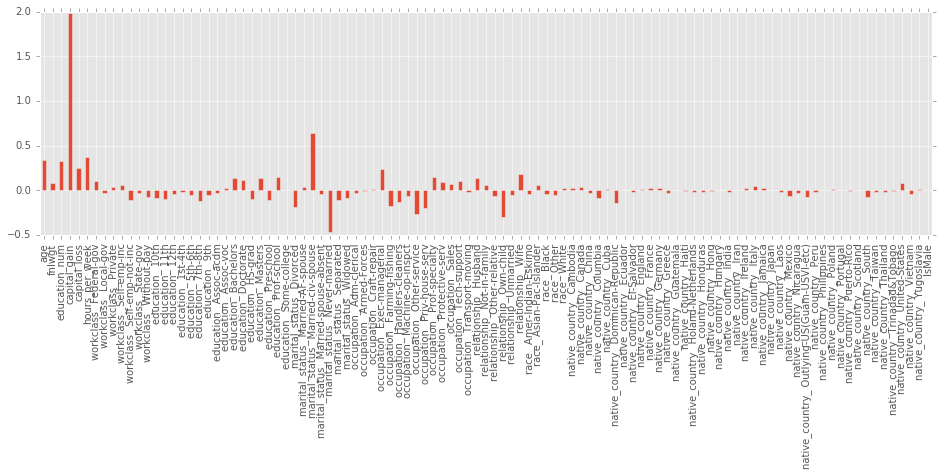

{'boxes': [<matplotlib.lines.Line2D at 0x12d3c2b0>],
 'caps': [<matplotlib.lines.Line2D at 0x12d3cef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12d4ff98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12d4fa20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12d3c390>,
  <matplotlib.lines.Line2D at 0x12d3c978>]}

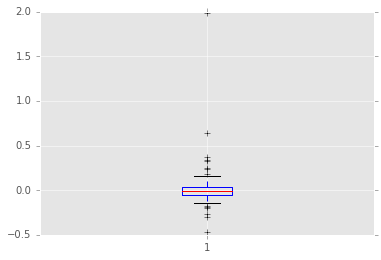

In [12]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(16,4))
weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

plt.boxplot(weights)


After observing the weights, we find only keeping variables with a weight greater than or equal to .31 yields an optimal model.

The four blocks of code below were run to determine the accuracy associated with keeping different variables based upon their weights:

coef <= 0.1 yields approx. 84% accuracy - 15 attributes<br>
coef <= 0.15 yields approx. 84% accuracy - 10 attributes<br>
coef <= 0.2 yields approx. 84% accuracy - 9 attributes<br>
coef <= 0.25 yeilds approx. 83% accuracy - 7 attributes<br>
coef <= 0.31 yeilds approx. 83% accuracy - 5 attributes<br>
coef <= 0.35 yeilds approx. 80% accuracy - 3 attributes<br>
coef <= 0.4 yeilds approx. 78% accuracy - 2 attributes<br>

We feel an 80% accuracy which keeps capital_gain, hours_per_week, age, education_num, and marital_status_ Married-civ-spouse is a suitable model which minimizes overfitting.

In [13]:
## http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
 
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight

## Dropping weights less than or equal to 0.35
for coef, name in zip_vars:
    if coef <= 0.31:
        df.drop(name, axis=1, inplace=True)
        print("dropping",name)

('dropping', 'IsMale')
('dropping', 'native_country_ Ecuador')
('dropping', 'education_ Some-college')
('dropping', 'native_country_ Iran')
('dropping', 'native_country_ Scotland')
('dropping', 'native_country_ Hungary')
('dropping', 'native_country_ Haiti')
('dropping', 'native_country_ Philippines')
('dropping', 'native_country_ Guatemala')
('dropping', 'native_country_ Puerto-Rico')
('dropping', 'native_country_ Portugal')
('dropping', 'native_country_ Japan')
('dropping', 'occupation_ Armed-Forces')
('dropping', 'occupation_ Craft-repair')
('dropping', 'native_country_ Poland')
('dropping', 'native_country_ Trinadad&Tobago')
('dropping', 'native_country_ Hong')
('dropping', 'native_country_ Honduras')
('dropping', 'native_country_ Thailand')
('dropping', 'native_country_ Holand-Netherlands')
('dropping', 'native_country_ Taiwan')
('dropping', 'native_country_ Laos')
('dropping', 'native_country_ Yugoslavia')
('dropping', 'native_country_ Cuba')
('dropping', 'native_country_ England

Review what is in the dataframe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 5 columns):
age                                   30162 non-null int64
education_num                         30162 non-null int64
capital_gain                          30162 non-null float64
hours_per_week                        30162 non-null int64
marital_status_ Married-civ-spouse    30162 non-null float64
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


<b>With the new dataset, we again are performing an 80/20 split of data for cross validating the models with training/test data</b>

In [15]:
X = df.values # use everything else to predict!

## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
#    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(30162, n_iter=3, test_size=0.2, random_state=None)


In [16]:
## Re run logistic regression with dropped weights

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # View accuracies
    accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
    print(accuracies)

[ 0.83109564  0.8445218   0.83391348]
[ 0.83374772  0.84253274  0.83606829]
[ 0.84435604  0.82512846  0.83242168]


In [17]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    

('age', 'has weight of', 0.027018074889014327)
('education_num', 'has weight of', 0.34482164471139387)
('capital_gain', 'has weight of', 0.00030400305904634015)
('hours_per_week', 'has weight of', 0.026320923514604508)
('marital_status_ Married-civ-spouse', 'has weight of', 2.2804926172355242)


In [18]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

('accuracy:', 0.84153820653074751)
[[4249  280]
 [ 676  828]]
('hours_per_week', 'has weight of', 0.34975698464624677)
('age', 'has weight of', 0.39253998674619256)
('education_num', 'has weight of', 0.92411544245519184)
('marital_status_ Married-civ-spouse', 'has weight of', 1.1637891581954269)
('capital_gain', 'has weight of', 2.0271306095094541)


The most important attribute from the logistic regression model is 'capital_gain' followed by 'marital_status_Married-civ-spouse', 'education_num', 'age', and 'hours_per_week' in predicting whether income is greater than \$50K per year or if it is equal to or less than \$50K per year. This is illustrated by the bar graph below. People with a salary of greater than $50K can be assumed to have higher capital gains. It is also more typical for one to increase income as they get old and have more education which is why it makes sense that age and education_num also are part of the model. Marriage tends to create typically create more stability, therefore, one would expect a better earning potential. They will be more career-focused. Lastly, hard work usually pays off, so higher hours worked per week should create a higher earning potential.

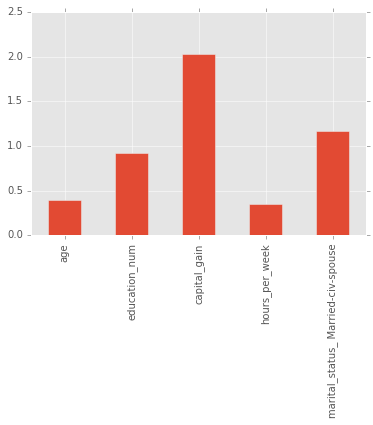

In [19]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')
plt.show()

## Support Vector Machines

In [20]:
from sklearn.svm import SVC

svm_clf = SVC(C=0.05, kernel = 'linear', degree = 3, gamma = 'auto') # get object, the 'C' value is less (can you guess why??)
svm_clf.fit(X_train_scaled,y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

# sort these attributes and spit them out
zip_vars = zip(svm_clf.coef_.T,df.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

('accuracy:', 0.83888612630532078)
[[4254  275]
 [ 697  807]]
('age', 'has weight of', 0.16555746609655425)
('hours_per_week', 'has weight of', 0.18745677201966654)
('marital_status_ Married-civ-spouse', 'has weight of', 0.76363838129314843)
('education_num', 'has weight of', 0.88286266873382613)
('capital_gain', 'has weight of', 1.7028067019547324)


The support vector machine is pulling similar results and has the same five attributes as being part of the optimal model in projecting income.

In [21]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(9314L, 5L)
(9314L,)
[4659 4655]


[[ 0.16555747  0.88286267  1.7028067   0.18745677  0.76363838]]


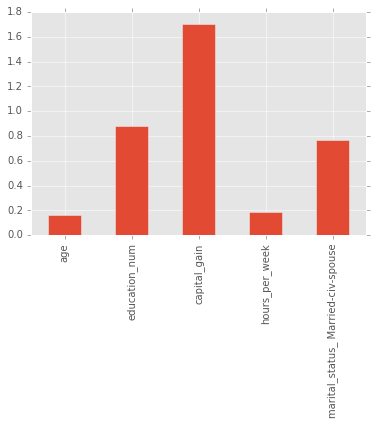

In [22]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')

Based on the graph and statistics above, we do not see a real difference between between the logistic regression model and the support vector machine model. This might imply that both are linearly separable and would be good fits for analyzing this dataset. 

In [23]:

# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grab the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['salary_cat_binary'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df['salary_cat_binary'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9314 entries, 11372 to 7834
Data columns (total 6 columns):
age                                   9314 non-null int64
education_num                         9314 non-null int64
capital_gain                          9314 non-null float64
hours_per_week                        9314 non-null int64
marital_status_ Married-civ-spouse    9314 non-null float64
salary_cat_binary                     9314 non-null int32
dtypes: float64(2), int32(1), int64(3)
memory usage: 473.0 KB


C:\Users\Brad_2\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


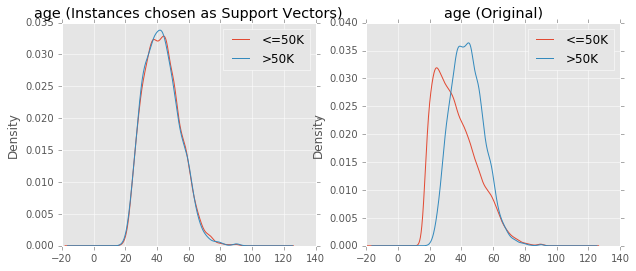

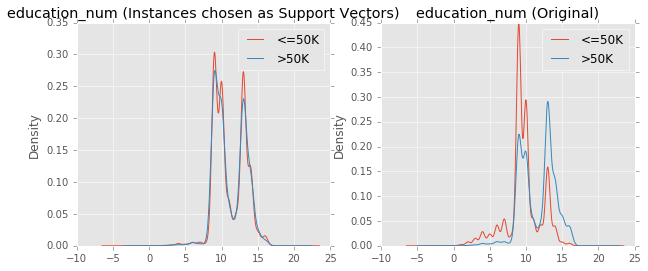

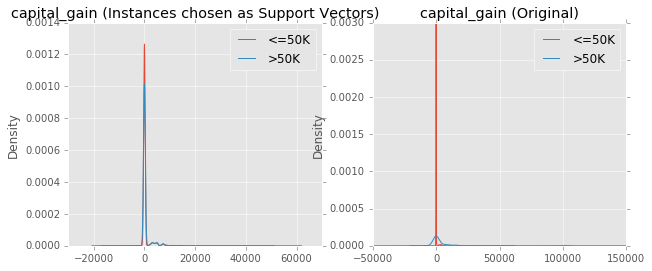

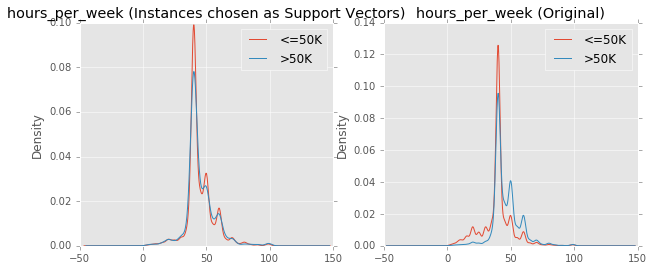

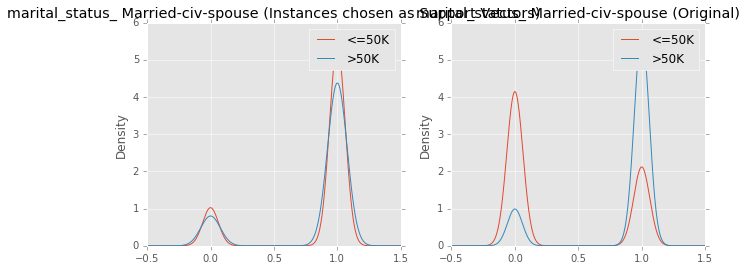

In [24]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot
from matplotlib import pyplot as plt
# group the original data and the support vectors
df_grouped_support = df_support.groupby(['salary_cat_binary'])
df_grouped = df.groupby(['salary_cat_binary'])

# plot KDE of Different variables
vars_to_plot = ['age', 'education_num', 'capital_gain', 'hours_per_week',
               'marital_status_ Married-civ-spouse']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

The graphs above show the difference from what the original data distribution is versus the model's distribution is per attribute. The model smoothes out the distribution. 

## SVM vs. Logistic Regression

Logistic Regression fits the data points as if they are along a continuous function. Logistic regression creats a model with a contiuous function of which the data points are fitted to. Support vector machines makes the attempt to create a model with a fitted function in attempt to separate two classes of multiple dimensions. Support vector machines don't work as well when there is not as much room for margin or when it cannot separte the classes.

source: https://www.quora.com/What-is-the-difference-between-Linear-SVMs-and-Logistic-Regression